In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist["data"], mnist["target"]

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

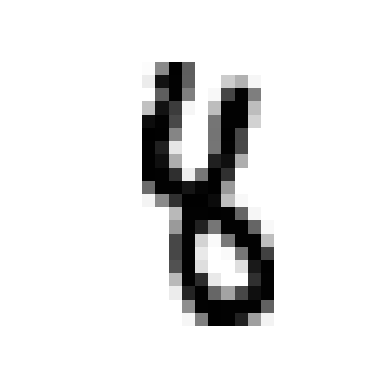

In [6]:
some_digit = X[7000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
"""param_grid = [{'weights': ['distance', 'uniform'],'n_neighbors':[4,5]}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.best_params_"""

grid_search.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(knn_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9704
0.9693
0.96715


In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[5882,    4,    5,    0,    1,    5,   19,    1,    2,    4],
       [   2, 6705,   10,    2,    1,    1,    3,   11,    2,    5],
       [  51,   60, 5695,   15,   11,    4,    9,   87,   17,    9],
       [   8,   16,   39, 5903,    1,   63,    4,   40,   33,   24],
       [   3,   53,    1,    1, 5628,    0,   13,   11,    2,  130],
       [  14,   18,    4,   67,    6, 5211,   58,    7,   11,   25],
       [  24,   13,    1,    0,    5,   27, 5846,    0,    2,    0],
       [   4,   68,   14,    3,   20,    1,    0, 6083,    3,   69],
       [  25,   85,   15,   87,   35,  111,   26,   19, 5382,   66],
       [  19,   13,    5,   45,   46,   12,    5,   79,   15, 5710]],
      dtype=int64)

In [45]:
from scipy.ndimage.interpolation import shift
img = X_train[1].reshape((28,28))

def shift_image(image, dx, dy):
    
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy,dx], cval=0, mode="constant")
    
    return shifted_image.reshape([-1])

C:\Users\hogeon\AppData\Local\Temp\ipykernel_19332\889560895.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


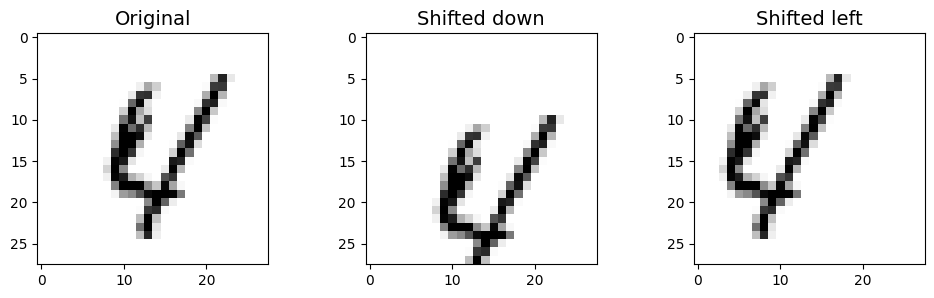

In [46]:
image = X_train[700]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28,28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [47]:
print(shifted_image_down)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000